## BIG MART SALES PREDICTION

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import dataset
trainset = pd.read_csv(r"D:\Data\CSV\Big mart sells prediction\train_v9rqX0R.csv")
testset = pd.read_csv(r"D:\Data\CSV\Big mart sells prediction\test_AbJTz2l.csv")
ss = pd.read_csv(r"D:\Data\CSV\Big mart sells prediction\sample_submission_8RXa3c6.csv")

In [3]:
# read dataset

In [4]:
trainset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
testset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
ss.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000


In [7]:
# finding shape to get the number of features

In [8]:
trainset.shape

(8523, 12)

In [9]:
testset.shape

(5681, 11)

In [10]:
ss.shape

(5681, 3)

## TRAIN DATASET

In [11]:
# basic information

In [12]:
trainset.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [13]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [14]:
# check missing values
trainset.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

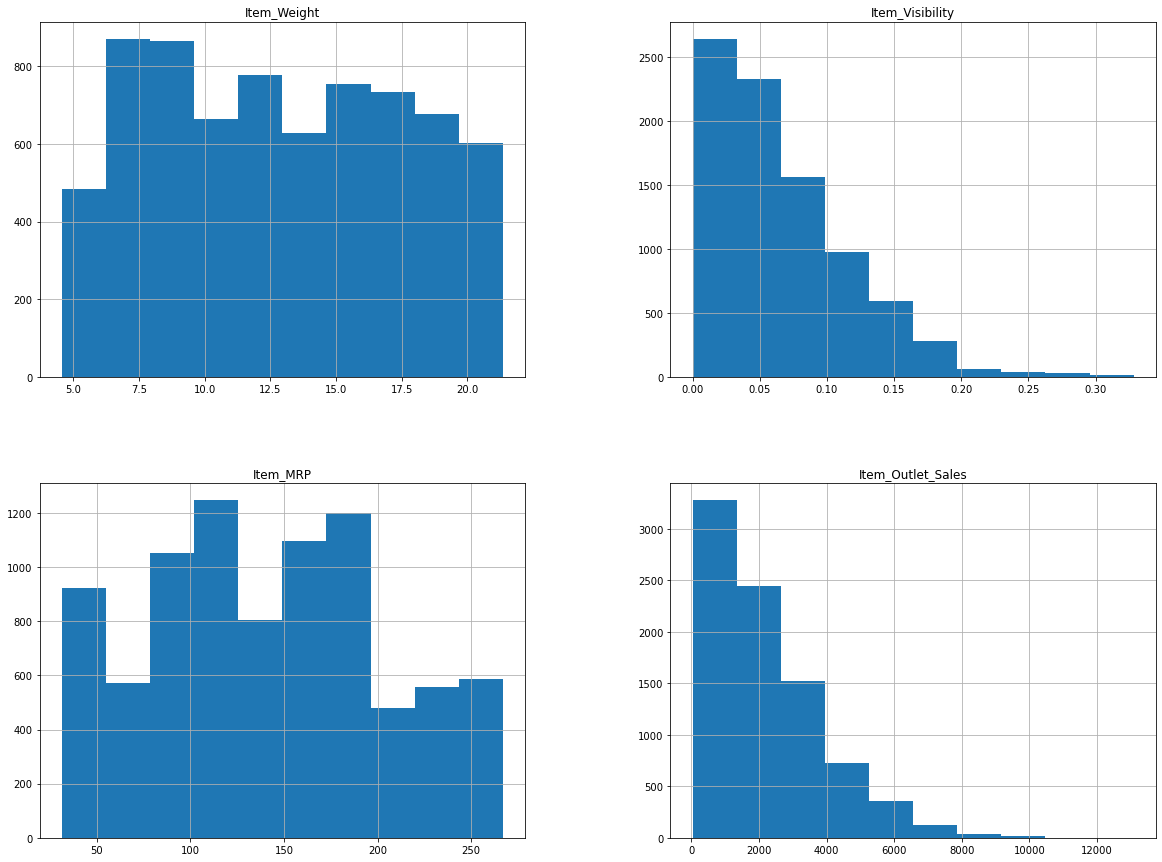

In [15]:
freqgraph = trainset.select_dtypes(include=['float'])
freqgraph.hist(figsize = (20,15));

In [16]:
trainset['Item_Weight'].mean()

12.857645184136183

C:\Users\HP\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


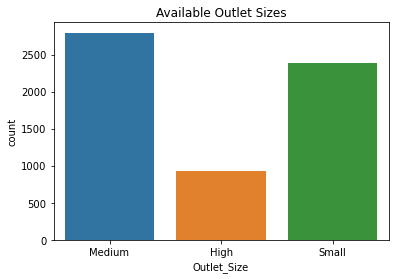

In [17]:
sns.countplot(trainset['Outlet_Size'])
plt.title("Available Outlet Sizes");

In [18]:
trainset['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [19]:
# filling missing values

In [20]:
trainset['Item_Weight'] = trainset['Item_Weight'].fillna(trainset['Item_Weight'].mean())
trainset['Outlet_Size'] = trainset['Outlet_Size'].fillna(trainset['Outlet_Size'].mode()[0])

In [21]:
trainset.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [22]:
# data analysis

In [23]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


C:\Users\HP\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

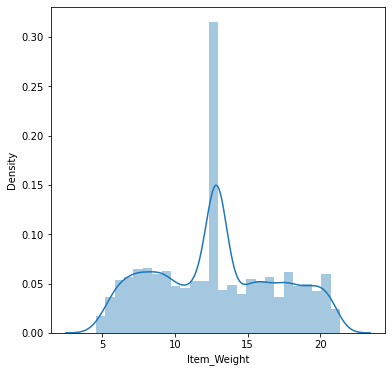

In [24]:
# distribution of all float dtype

# Item_Weight
plt.figure(figsize=(6,6))
sns.distplot(trainset['Item_Weight'])

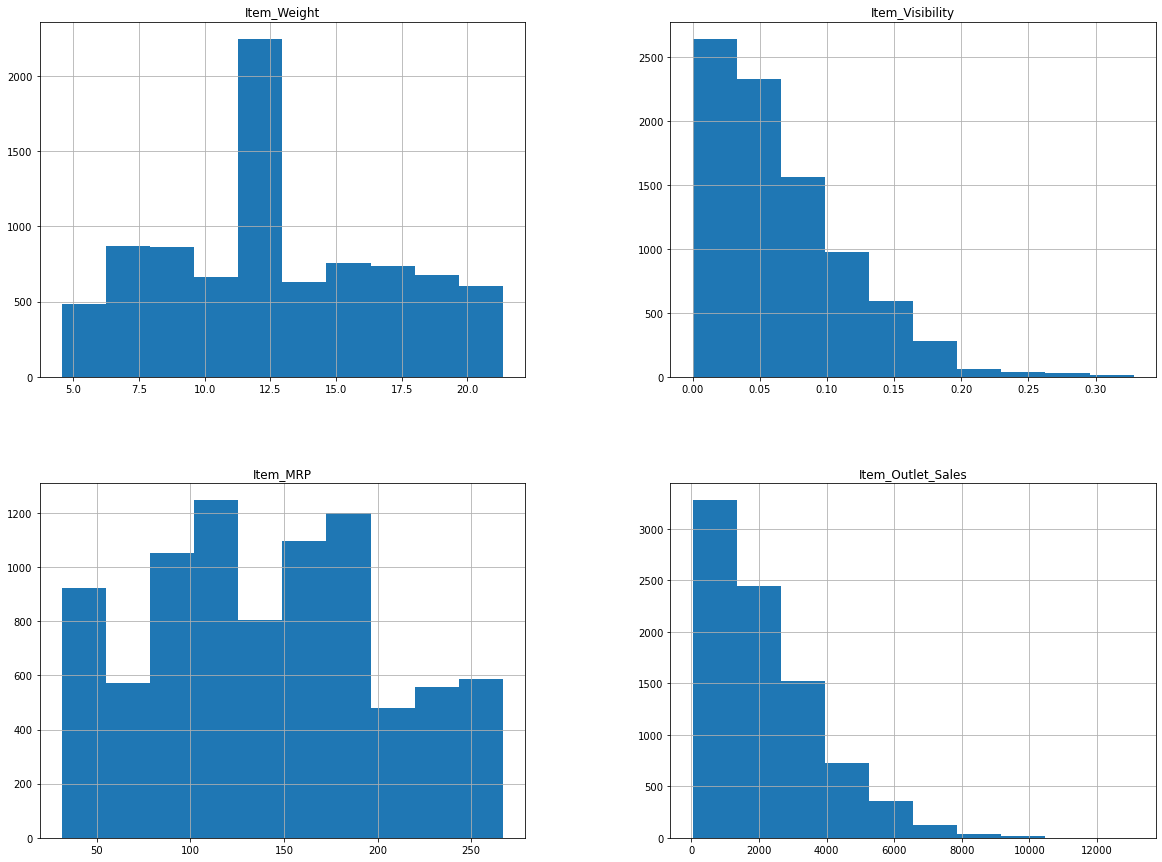

In [25]:
displot = trainset.select_dtypes(include=['float'])
displot.hist(figsize = (20,15));

In [26]:
# ploting the categorical features

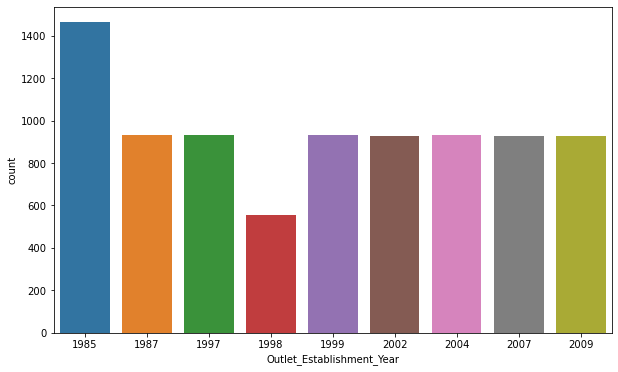

In [27]:
# Outlet_Establishment_Year column
plt.figure(figsize=(10,6))
sns.countplot(x='Outlet_Establishment_Year', data=trainset);

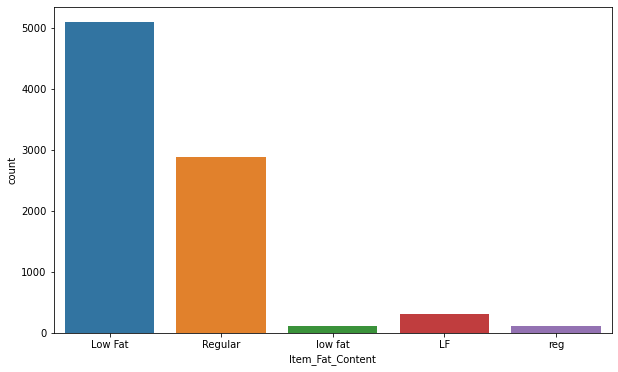

In [28]:
# Item_Fat_Content column
plt.figure(figsize=(10,6))
sns.countplot(x='Item_Fat_Content', data=trainset);

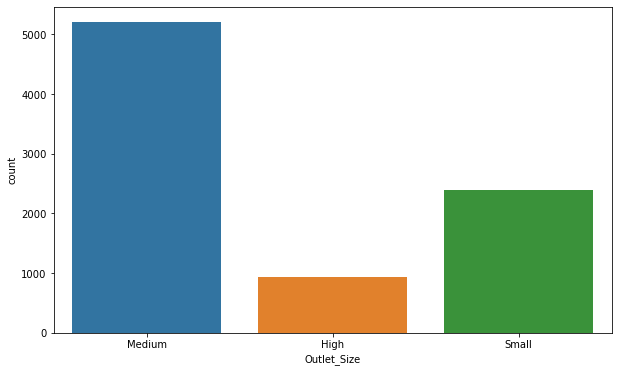

In [29]:
# Outlet_Size column
plt.figure(figsize=(10,6))
sns.countplot(x='Outlet_Size', data=trainset);

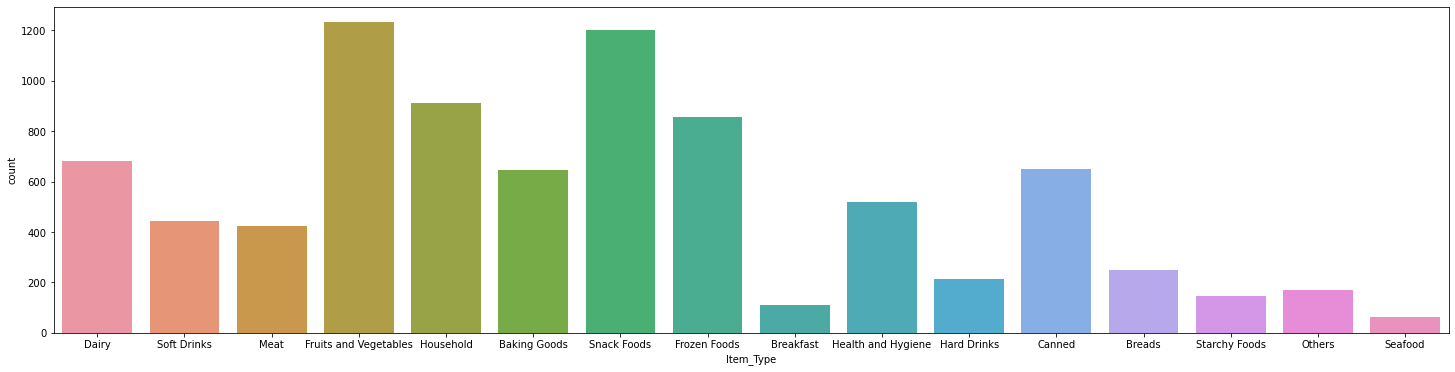

In [30]:
# Item_Type column
plt.figure(figsize=(25,6))
sns.countplot(x='Item_Type', data=trainset);

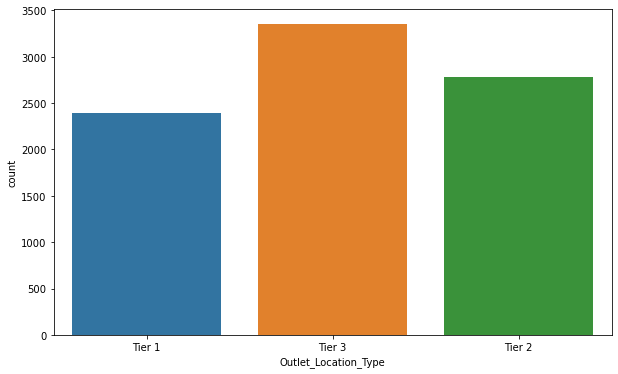

In [31]:
# Outlet_Location_Type column
plt.figure(figsize=(10,6))
sns.countplot(x='Outlet_Location_Type', data=trainset);

In [32]:
# data preprocessing

In [33]:
trainset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [34]:
trainset['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [35]:
trainset['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [36]:
trainset['Item_Fat_Content'] = trainset['Item_Fat_Content'].replace({'LF':'Low Fat', 'low fat':'Low Fat',  'reg':'Regular'})

In [37]:
trainset['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [38]:
trainset['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [39]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [40]:
# target - Item_Outlet_Sales

# Label encode the features---
  # Item_Identifier 
  # Item_Fat_Content
  # Item_Type 
  # Outlet_Identifier 
  # Outlet_Location_Type 
  # Outlet_Size 
  # Outlet_Type 

In [41]:
# label encode
from sklearn.preprocessing import LabelEncoder
columns = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type']
le = LabelEncoder()

In [42]:
for i in columns:
    trainset[i] = le.fit_transform(trainset[i])

In [43]:
trainset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


### TEST DATASET

In [44]:
# check dataset

In [45]:
testset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [46]:
testset.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [47]:
# filling missing values

In [48]:
testset['Item_Weight'] = testset['Item_Weight'].fillna(testset['Item_Weight'].mean())
testset['Outlet_Size'] = testset['Outlet_Size'].fillna(testset['Outlet_Size'].mode()[0])

In [49]:
testset.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [50]:
testset['Item_Fat_Content'] = testset['Item_Fat_Content'].replace({'LF':'Low Fat', 'low fat':'Low Fat',  'reg':'Regular'})

In [51]:
testset['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [52]:
testset.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,5681.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.245189,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,9.195000,0.027047,94.412000,1987.000000
50%,12.695633,0.054154,141.415400,1999.000000
75%,15.850000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [53]:
columns

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Location_Type',
 'Outlet_Size',
 'Outlet_Type']

In [54]:
# label encode

In [55]:
for i in columns:
    testset[i] = le.fit_transform(testset[i])

In [56]:
testset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,0,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300000,1,0.038428,4,87.3198,2,2007,1,1,1
2,1406,14.600000,0,0.099575,11,241.7538,0,1998,1,2,0
3,809,7.315000,0,0.015388,13,155.0340,2,2007,1,1,1
4,1184,12.695633,1,0.118599,4,234.2300,5,1985,1,2,3


In [57]:
# splitting into feature and target
X = trainset.drop('Item_Outlet_Sales', axis =1)
y = trainset['Item_Outlet_Sales']

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model

In [60]:
# we can do kfold cross validation method

In [61]:
from sklearn.model_selection import cross_val_score

In [62]:
from sklearn.metrics import r2_score

In [63]:
def kfolds(model, model_name):
    model = cross_val_score(model, X,y, cv=10)
    model_score = np.average(model)
    print(f"{model_name} score on cross validation: {model_score * 100} %")

def train(model, model_name):
    model.fit(X_train, y_train)
    model_train_score = model.score(X_train, y_train)
    model_test_score = model.score(X_test, y_test)
    print(f"{model_name} model score on Training data: {model_train_score * 100} %\n{model_name} model score on Testing data: {model_test_score * 100} %")

def r2(model, model_name):
    score = r2_score(y_test, model.predict(X_test))
    print(f"R2 Score for {model_name} is {score * 100} %")

In [64]:
# on different regression models

In [65]:
# Linear Regression model

In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
lr = LinearRegression()
kfolds(lr, "Linear Regression")

Linear Regression score on cross validation: 50.73899961849937 %


In [68]:
train(lr, "Linear Regression")

Linear Regression model score on Training data: 50.65363930805089 %
Linear Regression model score on Testing data: 52.46461805160523 %


In [69]:
r2(lr, "Linear Regression")

R2 Score for Linear Regression is 52.46461805160523 %


In [70]:
# SVR model

In [71]:
from sklearn.svm import SVR

In [72]:
svr = SVR(gamma='auto', kernel='rbf', C=5)

In [73]:
kfolds(svr, "SVR")

SVR score on cross validation: -5.188969713950762 %


In [74]:
train(svr, "SVR")

SVR model score on Training data: -4.8565798640539 %
SVR model score on Testing data: -3.097141048019192 %


In [75]:
r2(svr, "SVR")

R2 Score for SVR is -3.097141048019192 %


In [76]:
# Desicion Tree Regressor Model

In [77]:
from sklearn.tree import DecisionTreeRegressor

In [78]:
dtree = DecisionTreeRegressor()
kfolds(dtree, "Decision Tree")
train(dtree, "Decision Tree")
r2(dtree, "Decision Tree")

Decision Tree score on cross validation: 19.680129428066863 %
Decision Tree model score on Training data: 100.0 %
Decision Tree model score on Testing data: 16.04582091201453 %
R2 Score for Decision Tree is 16.04582091201453 %


In [79]:
# Random Forest Regressor Model

In [80]:
from sklearn.ensemble import RandomForestRegressor

In [81]:
randomf = RandomForestRegressor()
kfolds(randomf, "Random Forest")
train(randomf, "Random Forest")
r2(randomf, "Random Forest")

Random Forest score on cross validation: 55.34051065246901 %
Random Forest model score on Training data: 93.82428781797904 %
Random Forest model score on Testing data: 55.59670253623816 %
R2 Score for Random Forest is 55.59670253623816 %


In [82]:
# Gradient Boosting Regressor Model

In [83]:
from sklearn.ensemble import GradientBoostingRegressor

In [84]:
gbr = GradientBoostingRegressor()
kfolds(gbr, "Gradient Boosting")
train(gbr, "Gradient Boosting")
r2(gbr, "Gradient Boosting" )

Gradient Boosting score on cross validation: 59.277319300105326 %
Gradient Boosting model score on Training data: 63.37140261680108 %
Gradient Boosting model score on Testing data: 60.422019150947804 %
R2 Score for Gradient Boosting is 60.422019150947804 %


In [85]:
# Bagging Regressor Model

In [86]:
from sklearn.ensemble import BaggingRegressor

In [87]:
br = BaggingRegressor()
kfolds(br, "Bagging Regressor")
train(br, "Bagging Regressor")
r2(br, "Bagging Regressor")

Bagging Regressor score on cross validation: 51.67837476863296 %
Bagging Regressor model score on Training data: 91.7573510756171 %
Bagging Regressor model score on Testing data: 52.67556205729149 %
R2 Score for Bagging Regressor is 52.67556205729149 %


In [88]:
# from the above models the r2 scores are

In [89]:
r2(lr, "Linear Regression")

R2 Score for Linear Regression is 52.46461805160523 %


In [90]:
r2(svr, "SVR")

R2 Score for SVR is -3.097141048019192 %


In [91]:
r2(dtree, "Decision Tree")

R2 Score for Decision Tree is 16.04582091201453 %


In [92]:
r2(randomf, "Random Forest")

R2 Score for Random Forest is 55.59670253623816 %


In [93]:
r2(gbr, "Gradient Boosting" )

R2 Score for Gradient Boosting is 60.422019150947804 %


In [94]:
r2(br, "Bagging Regressor")

R2 Score for Bagging Regressor is 52.67556205729149 %


In [95]:
# Gradient Boosting Regressor have the best r2 score

In [96]:
# but GBR have negative value in the prediction, so we take next best, i.e., Random Forest

### Submission File

In [97]:
# Random Forest

In [98]:
randomf.fit(X,y)

RandomForestRegressor()

In [99]:
randomf.score(X,y)

0.9391008188475712

In [100]:
y_pred = randomf.predict(testset)

In [101]:
y_pred

array([1676.491058, 1256.790712,  704.54956 , ..., 1759.070232,
       4551.10919 , 1474.487338])

In [102]:
ss.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000


In [103]:
ss['Item_Outlet_Sales'] = y_pred

In [104]:
ss.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1676.491058
1,FDW14,OUT017,1256.790712
2,NCN55,OUT010,704.549560
3,FDQ58,OUT017,2379.009928
4,FDY38,OUT027,6247.687434


In [105]:
ss.shape

(5681, 3)

In [106]:
ss.to_csv("D:\\Data\\CSV\\Big mart sells prediction\\submission_randomforest.csv", index=False)

In [107]:
df = pd.read_csv(r"D:\Data\CSV\Big mart sells prediction\submission_randomforest.csv")

In [108]:
df.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1676.491058
1,FDW14,OUT017,1256.790712
2,NCN55,OUT010,704.549560
3,FDQ58,OUT017,2379.009928
4,FDY38,OUT027,6247.687434
